#Продвинутый Python, ДЗ-8 (на 20 баллов)

Правила игры:

В домашке 6 задач, разбаловка указана в задании. Суммарно за дз можно получить 20 баллов (без дополнительных заданий)

Дедлайн - 21 декабря. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

## Задание 1. Обедающие Философы [4 балла]

За круглым столом обедают n философов (thread), берут ближайшую вилку в обе руки за обедом (если могут), вилок тоже n. Как философ поел он пытается поесть снова, в соответствии с личным расписанием приема пищи, поскольку как истинный философ он ненасытен. Он не знает статус других философов и не может их опросить прежде чем начать трапезу, философ смотрит только на ближайшие к себе вилки.

Ваша задача придумать заключается в том чтобы придумать модель поведения философа, при котором ни один из философов не будет голодать, то есть будет вечно чередовать приём пищи и отдых.

Нужно протестировать его с n = 5,6,7 и объяснить почему ваше решение обощается позволяет обойти потенциальный дедлок.


### Deadlock
Задача сформулирована таким образом, чтобы иллюстрировать проблему избежания взаимной блокировки — состояния системы, при котором прогресс невозможен.

Например, можно посоветовать каждому философу выполнять следующий алгоритм:

* Размышлять, пока не освободится левая вилка. Когда вилка освободится — взять её.
* Размышлять, пока не освободится правая вилка. Когда вилка освободится — взять её.
* Есть
* Положить левую вилку
* Положить правую вилку
* Повторить алгоритм сначала

Это решение задачи некорректно: оно позволяет системе достичь состояния взаимной блокировки, когда каждый философ взял вилку слева и ждёт, когда вилка справа освободится


### Рекомендации по коду
1. Класс обед должен отслеживать что 2 философа рядом не получат вилку вместе
2. Обед считается оконченным если все поели хотя бы по 5 раз, при этом философ который уже поел пять раз не перестает есть, это нужно нам только для тестирования, предложенный алгоритм должен поддерживать всех философов накормленными в случае бесконечной работы.
3. Каждый филосов внутри себя зовет методы eat/think по очереди

In [78]:
import threading
import time
import random

num_philosophers = 6

class Dinner:
    def __init__(self, num_philosophers):
        self.n = num_philosophers
        self.forks = {i : 1 for i in range(num_philosophers)}
        self.phils = {i : 0 for i in range(num_philosophers)}


    def finished(self):
        flag = True
        for i in range(self.n):
            flag &= (self.phils[i] >= 5)
        return flag


    @staticmethod
    def think():
        # Подумали случайное время, это может быть полезно менять в рамках самотестирования
        time.sleep(0.15 * random.random())

    @staticmethod
    def eat():
        # Покушали случайное время, это может быть полезно менять в рамках самотестирования
        time.sleep(0.25 * random.random())


    def philosopher(self, i):
        while not self.finished():
            # print(self.phils)
            left, right = i, (i + 1) % num_philosophers
            first_fork, second_fork = min(right, left), max(right, left)
        
            if self.forks[first_fork]:
                if self.forks[second_fork]:
                    self.forks[first_fork] = 0
                    self.forks[second_fork] = 0
                    
                    self.eat()
                    
                    self.phils[i] += 1
                    self.forks[second_fork] = 1
                    self.forks[first_fork] = 1
                    
                    self.think()
                else:
                    self.think()
            else:
                self.think()
    


# dinner = Dinner(num_philosophers)
# philosophers = [threading.Thread(target=dinner.philosopher, args=(i,)) for i in range(num_philosophers)]
# for p in philosophers:
#     p.start()
# for p in philosophers:
#     p.join()

Функция для проверки вашего решения:

In [79]:
import multiprocess

def checker():
    for check_iteration in range(3):
        dinner = Dinner(num_philosophers)
        philosophers = [threading.Thread(target=dinner.philosopher, args=(i,)) for i in range(num_philosophers)]
        for p in philosophers:
            p.start()
        for p in philosophers:
            p.join()


process = multiprocess.Process(target=checker)

process.start()
process.join(timeout=60)

if process.is_alive():
    print("Ваши философы кажется медленно едят... Похоже на дедлок!")
    process.terminate()
else:
    print("Выглядит правдоподобно!")

Выглядит правдоподобно!


Решение:
1. Философ смотрит свободна ли вилка с меньшим номером, затем с большим. Если да, то ест. 
2. Иначе думает
3. Как только поел - кладёт вилку с большим номером, затем с меньшим
4. Думает
5. Повтор цикла

Это работает потому что каждый философ смотрит на конкретную вилку с маленьким номером и в случае освобождения какой-то вилки всегда эта вилка будет переходить сразу "в работу" соседу и после того как сосед прекращает есть - следующая освобождённая вилка передаётся дальше по кругу.

## Задание 2. Корабли [3 балла]

Есть транспортные корабли, которые плывут от “генератора” к причалам для погрузки разного рода товаров.

Существует 3 Типа кораблей (с хлебом, с бананами и с одеждой) и три вида вместительности 10, 50, 100 шт. товаров. 3 типа кораблей * 3 вида вместительности = 9 разных видов кораблей.


In [ ]:
from enum import Enum

class ShipSize(Enum):
    TINY = 10
    MED = 50
    LARGE = 100

class Load(Enum):
    BANANA = 'banana'
    BREAD = 'bread'
    CLOTHES = 'clothes'

Далее есть 3 вида причалов для погрузки кораблей — Хлеб, Банан и Одежда.

Каждый причал берет или подзывает к себе необходимый ему корабль и начинает его загружать. За одну секунду причал загружает на корабль 10 ед. товара. То есть если у корабля вместительность 50 шт., то причал загрузит его за 5 секунд своей работы. Причал может загружать только по одному кораблю.

Корабли проходят через узкий туннель где одновременно могут находиться только 5 кораблей. Прохождение через туннель занимает некоторое время (пусть 1 секунда для каждого корабля. Так как одновременно в тоннеле могут находиться 5 кораблей, это означает, что при одновременном выпуске с генератора 5 кораблей, они пройдут через тоннель за одну секунду).   
Каждый корабль представляет из себя отдельный поток (Thread). Соответственно генератор кораблей генерирует объекты, которые наследуют Thread и используют ThreadPoolExecutor или же запускают каждый поток с помощью интерфейсов start/join.

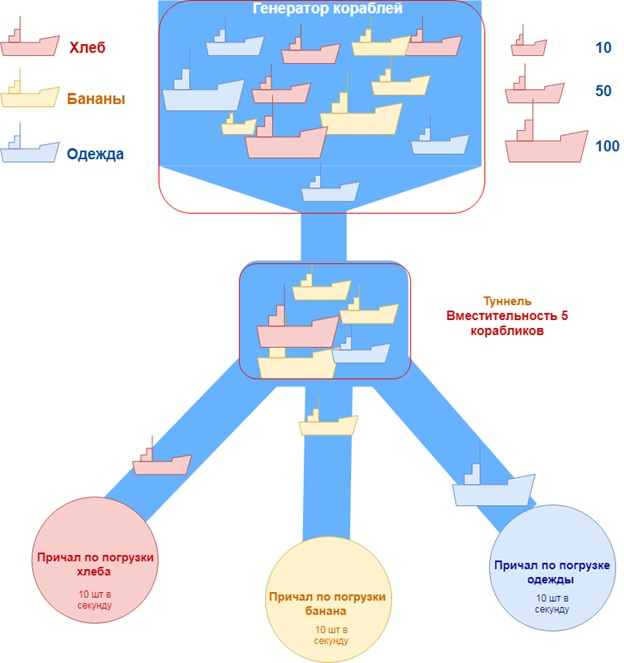

In [ ]:
import logging
import threading

def thread_id_filter(record):
    """Inject thread_id to log records"""
    record.thread_id = threading.get_native_id()
    return record

logger = logging.getLogger()
handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter('%(asctime)s - ID:%(process)d - %(thread_id)d - %(levelname)s - %(message)s'))
handler.addFilter(thread_id_filter)
logger.setLevel('INFO')

for hdlr in logger.handlers[:]:  # remove all old handlers
    logger.removeHandler(hdlr)
logger.addHandler(handler)      # set the new handler

from queue import Queue
import random

import time
from threading import Thread, Lock, Semaphore, BoundedSemaphore, current_thread

Некоторый костяк кода, чтобы всем было проще. Но вам нужно самим организовать код, задизайнить его так чтобы:
1. не было дедлоков, при любом сочетаний кораблей/ожиданий
2. Чтобы он был понятный и органичный, все разделено на функции и не было такого что вы вызываете разгрузку кораблей в туннеле, до того как корабль дошел до причала

In [ ]:
class Ship:
    def __init__(self, size: ShipSize, load: Load):
        self.size = size
        self.load = load
        self.cur_size = size.value

    def unload(self) -> bool:
        self.cur_size -= 10
        return self.cur_size > 0

In [ ]:
class Tunnel:
    def __init__(self):
      # ваш код
    # ваш код

In [ ]:
class PierLoader(Thread):
    def __init__(self, ...):
        super().__init__()
        # ваш код

    def run(self):
        # ваш код

In [ ]:
class ShipGenerator(Thread):
    def __init__(self, tunnel, ship_count):
        super().__init__()
        # ваш код

    def run(self):
        # ваш код

    def get_random_type(self):
        return random.choice(list(Load))

    def get_random_size(self):
        return random.choice(list(ShipSize))

Код для тестирования:

In [ ]:
from concurrent.futures import ThreadPoolExecutor

In [ ]:
tunnel = Tunnel()

ship_generator = ShipGenerator(tunnel, 100)

dress_loader = PierLoader(tunnel, Load.CLOTHES)
banana_loader = PierLoader(tunnel, Load.BANANA)
meal_loader = PierLoader(tunnel, Load.BREAD)

pool = ThreadPoolExecutor(max_workers=40)
# Submit tasks to pool
pool.submit(ship_generator.run)
pool.submit(dress_loader.run)
pool.submit(banana_loader.run)
pool.submit(meal_loader.run)

# Wait for tasks to complete
pool.shutdown()

## Задание 3. Фрактал Мандельброта [3 балла]

Необходимо реализовать алгоритм рисования [фрактала](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0).

Некоторые уточнения по задаче:
1. Необходимо реализовать [цветной вариант](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0#%D0%A6%D0%B2%D0%B5%D1%82%D0%BD%D1%8B%D0%B5_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%D1%8B). Ограничим число итераций 50, и как и предлагается на wiki рисовать в точке номер итерации.
2. Разделить на паралельные вычисления необходимо попиксельно, например разбив пиксели на квадратики и запуская внутренний цикл независимо в каждом блоке.
3. Не забывайте про векторизацию. Сравните векторизованную версию и распралленую по времени.
4. В условии специально не указано чем пользоваться threading или multiprocessing, нужно выбрать подходящий инструмент самим.
5. Разрешение изображения на выходе должно быть хотя бы 2k пикселей на 2k. В то же время для дебага рекомендую пробовать поменьше...

NB: если вы пользуетесь matplotlib попробуйте:
```
colormap = 'magma'
```

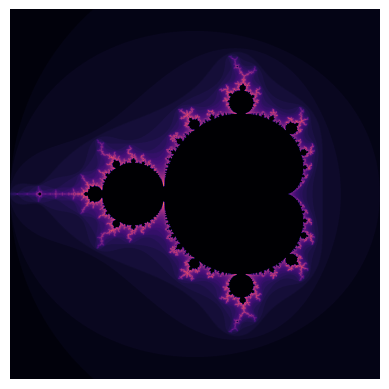

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocess as mp
from multiprocessing import Pool

# Функция для вычисления цвета пикселя
def calculate_pixel_color(x, y, max_iterations):
    c = complex(x, y)
    z = 0
    iteration = 0
    while abs(z) < 2 and iteration < max_iterations:
        z = z*z + c
        iteration += 1
    if iteration == max_iterations:
        return 0
    return iteration

# Функция для рисования части фрактала Мандельброта
def draw_mandelbrot_part(args):
    xmin, xmax, ymin, ymax, width, height, max_iterations = args
    mandelbrot_image_part = np.zeros((height, width))
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    for i in range(height):
        for j in range(width):
            mandelbrot_image_part[i, j] = calculate_pixel_color(x[j], y[i], max_iterations)
    return mandelbrot_image_part

# Параметры для рисования
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 2000, 2000
max_iterations = 50

# Разделяем изображение на части для параллельных вычислений
num_processes = 4  # Количество процессов
part_width = width // num_processes
pool = mp.Pool(processes=num_processes)

# Задаем аргументы для каждой части изображения
args_list = []
for i in range(num_processes):
    part_xmin = xmin + i * part_width * (xmax - xmin) / width
    part_xmax = xmin + (i + 1) * part_width * (xmax - xmin) / width
    args_list.append((part_xmin, part_xmax, ymin, ymax, part_width, height, max_iterations))

# Вычисляем каждую часть изображения параллельно
results = pool.map(draw_mandelbrot_part, args_list)

# Собираем все части изображения в одно
mandelbrot_image = np.hstack(results)

# Отображаем изображение с использованием colormap 'magma'
plt.imshow(mandelbrot_image, cmap='magma')
plt.axis('off')
plt.show()


### Бонус [до 3х баллов]

Нужно вспомнить домашку про dash и прикрутить красивый сайтик на котором фрактал можно будет зумить, кликать, крутить и например на каждый клик будет запускаться реализованная с помощью параллельных вычислений версия фрактала.

## Задание 4. Простейший fastapi сервис [1 балл] + 1 балл за стриминг эндпоинт

Ваша задача создать HTTP сервис с помощью fastapi/flask и двумся эндпоинтами, пусть эндпоинт /track возвращает ваш любимый (любой, мемы принимаются) трек (в bytecode) прочитав его с диска. А эндпоинт /track_by_name принимает на вход название трека с диска и точно так же возвращает его по названию.

Треки можно взять отсюда: https://www.last.fm/music/+free-music-downloads - если вы не хотите пиратить и написать wget в ноутбуке.

Так же, для удобства проверки напишите код чтобы запускать ваш сервис с помощью subprocess, точно так же как мы делали на семинаре.

## Задание 5. Нагрузочное тестирование для вашего сервиса. [4 балла] + 1 балл за тест к grpc streaming endpoint

Необходимо имплементировтаь функцию которая делает нагрузочное тестирование вашего сервиса: зовет его endpoint и замеряет сколько времени занял ответ. При этом вызовы должны быть независимы друг от друга, то есть когда сервис не отвечает, или отвечает долго, вы все равно должны его позвать снова.
При имлементации нужно использовать asynсio и не блокиующий нетворк, например aiohttp.

Нарисуйте графики работы вашего сервиса по времени и распределение времени ответов. Попробуйте определить максимальный RPC (requests per second), который ваш сервис может выдерживать.

## Задание 6. Кастомный async скрапер для Steam [5 баллов]

Парсим Steam с помощью asyncio (БЕЗ Scrapy).
Вы можете как взять свой код для этого задания из предыдущей домашки, так и делать его с нуля если вы не делали домашку на парсинг. Качество парсинга не будет оцениваться в этом задании, нам важно тут написать engine, который умеет обходить сайты и читать с них что-то.

Вам помогут следующие функции, если вы думаете про использование очереди для таскок, то рекомендую посмотреть на: `asyncio.LifoQueue`, чтобы сразу видеть результаты парсинга.



In [ ]:
!pip install selenium parsel

In [ ]:
# вставьте сюда своего павука (с небольшими изменениями), или переиспользуйте этого в рамках этой задачи
from urllib.parse import urlencode
import time
from parsel import Selector

queries = ['Assassins', 'Russia', 'стратегия']

class SteamgamesSpider:
    name = 'SteamgamesSpider'
    allowed_domains = ['store.steampowered.com']
    domain_url = 'http://store.steampowered.com/'

    def start_requests(self, page=1):
        for query in queries:
            for page in ['1', '2']:
                url = self.domain_url + 'search/?' + urlencode(
                    {'term': query, 'page': str(page), 'supportedlang': 'russian'})
                # your magic, we need somthing like:
                # request(url=url, callback=self.parse_page)

    def parse_page(self, response_text):
        selector = Selector(text=response_text)
        for game_url in selector.xpath('//div[@id="search_result_container"]/div/a/@href').getall():
            pass
            # your magic, we need somthing like:
            # request(url=game_url, callback=self.parse_game, cookies={'mature_content': '1'})

    def parse_game(self, response_text):
        game = {}
        selector = Selector(text=response_text)
        name = selector.xpath('//div[@class="apphub_AppName"]/text()').get()
        category = selector.xpath('//div[@class="breadcrumbs"]/div[@class="blockbg"]/a/text()').getall()
        game["name"] = name
        game["category"] = '->'.join(category)
        # your magic
        # return game